In [15]:
#importing and appltying all the nessisary library 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [16]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

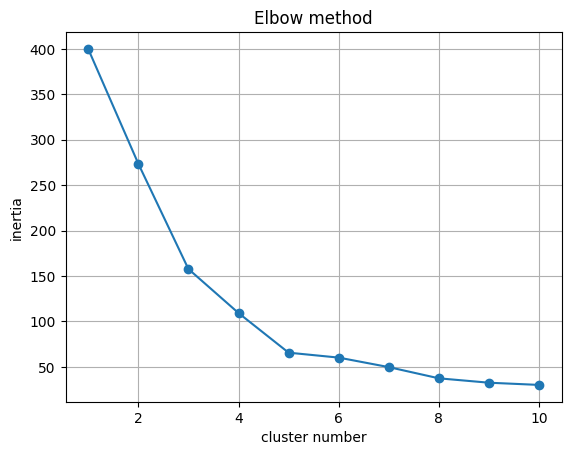

In [18]:
inertia = []
k= range(1,11)
for i in k:
    imeans = KMeans(n_clusters=i,random_state=42)
    imeans.fit(x_scaled)
    inertia.append(imeans.inertia_)
plt.plot(k,inertia,marker='o')
plt.xlabel('cluster number')
plt.ylabel('inertia')
plt.title('Elbow method')
plt.grid(True)
plt.show()

In [28]:
imeans = KMeans(n_clusters=5,random_state=42)
df['cluster']=imeans.fit_predict(x_scaled)
cluster_names = {
    0: 'Standard Spenders',
    1: 'Budget Cautious',
    2: 'Luxury Seekers',
    3: 'Potential Big Spenders',
    4: 'High Value Customers'
}
df['segment'] = df['cluster'].map(cluster_names)

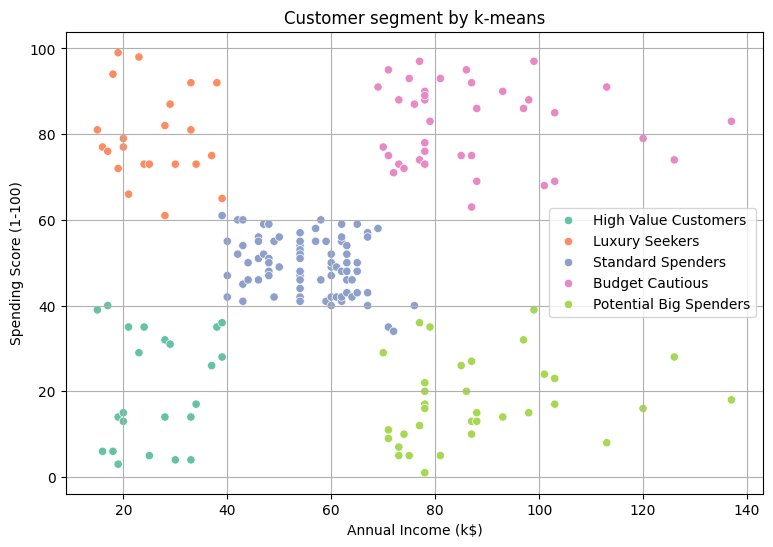

In [29]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='segment',palette='Set2')
plt.title('Customer segment by k-means')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
cluster_summary = df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


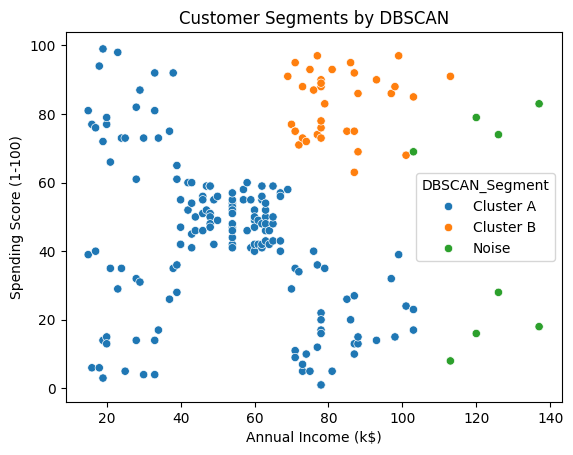

In [31]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)
DBSCAN_cluster_names = {
    -1: 'Noise',
     0: 'Cluster A',
     1: 'Cluster B',
     2: 'Cluster C',
     3: 'Cluster D'
}
df['DBSCAN_Segment'] = df['DBSCAN_Cluster'].map(DBSCAN_cluster_names)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Segment', palette='tab10')
plt.title('Customer Segments by DBSCAN')
plt.show()